# 🏏 IPL Match Winner Prediction Project
This project predicts the **winner of IPL matches** using different machine learning models.

### Steps Covered
1. Data Loading & Understanding
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Model Training
6. Model Evaluation
7. Hyperparameter Tuning
8. Model Comparison
9. Save Final Model

We will compare **Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and XGBoost**.

## 1. Data Loading & Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\MLPROJECT\ipl_matches.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Acer\AppData\Local\Temp\ipykernel_23364\738207572.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MLPROJECT\ipl_matches.csv")


In [3]:
print(df.head())
df.shape

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

(756, 18)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
print(df.isnull().sum())

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


## 2. Data Cleaning

In [6]:
# Drop irrelevant columns if not useful
df_clean = df.drop(columns=['id','date','umpire1','umpire2','umpire3'], errors='ignore')

# Drop missing values
df_clean = df_clean.dropna()

# Convert 'season' to numeric if it's like "IPL-2017"
if 'Season' in df_clean.columns:
    df_clean['Season'] = df_clean['Season'].str.replace("IPL-", "").astype(int)

In [7]:
df_clean.head()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


## 3. Exploratory Data Analysis (EDA)

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn theme for styling
sns.set_theme(style="whitegrid", palette="Set2")

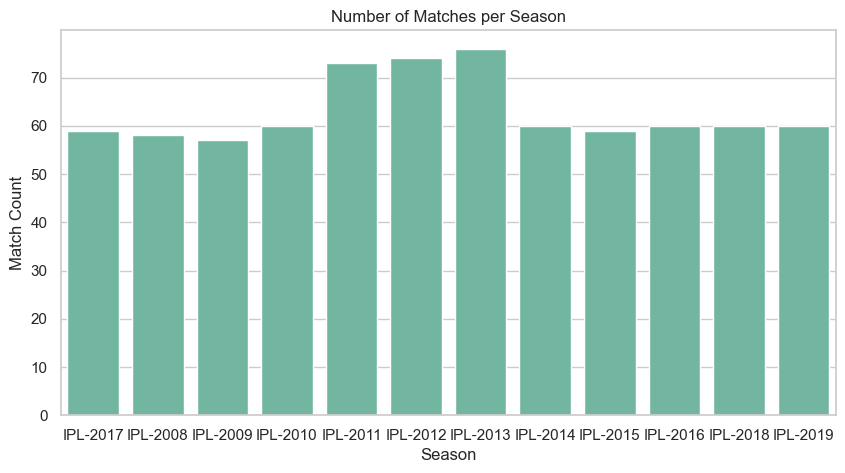

In [10]:
# Matches per Season

plt.figure(figsize=(10,5))
sns.countplot(x=df["Season"])   # if your column is 'Season'
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.show()

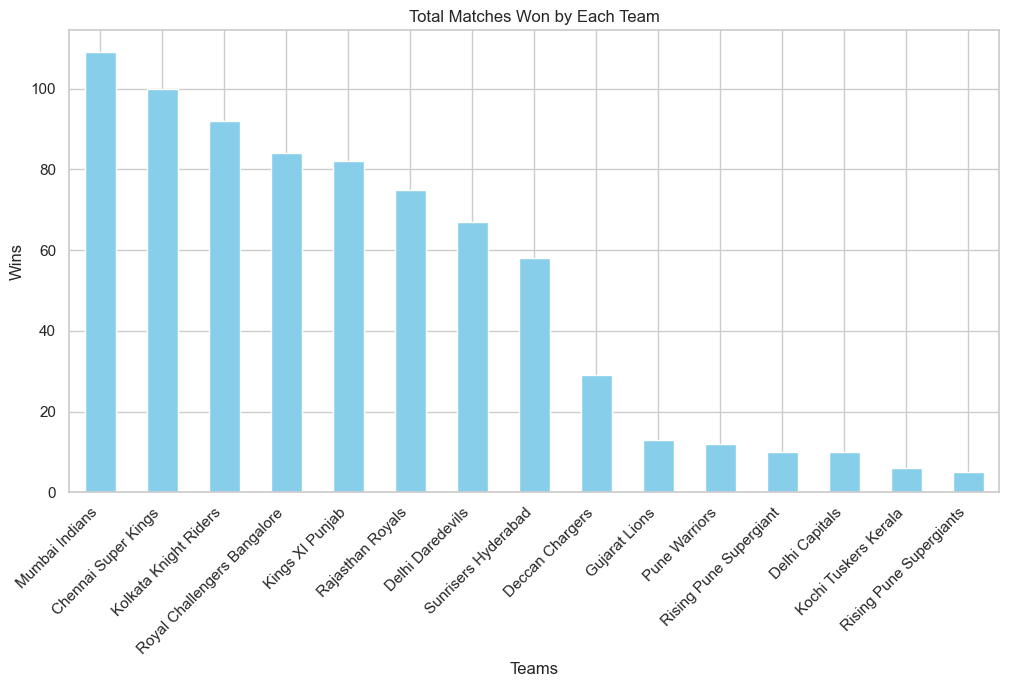

In [11]:
# Matches Won by Each Team

plt.figure(figsize=(12,6))
df["winner"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Total Matches Won by Each Team")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

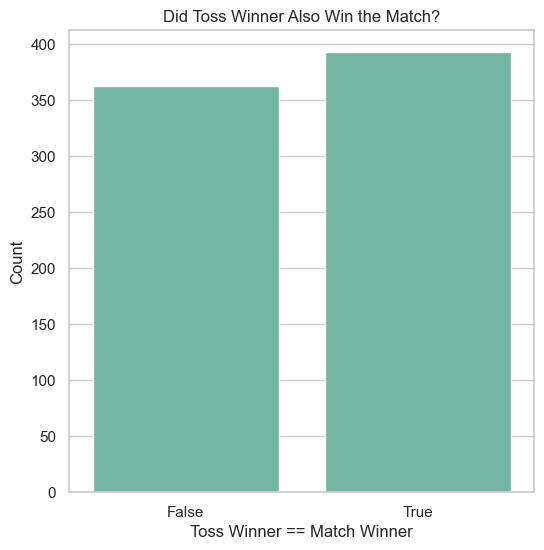

In [12]:
# Toss Winner vs Match Winner

plt.figure(figsize=(6,6))
sns.countplot(x=(df["toss_winner"] == df["winner"]))
plt.title("Did Toss Winner Also Win the Match?")
plt.xlabel("Toss Winner == Match Winner")
plt.ylabel("Count")
plt.show()

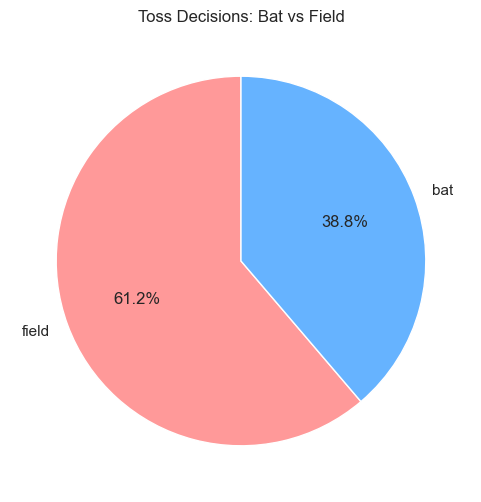

In [13]:
# Toss Decision Distribution(Bat/Field)

plt.figure(figsize=(6,6))
df["toss_decision"].value_counts().plot(
    kind="pie", 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#ff9999","#66b3ff"]
)
plt.title("Toss Decisions: Bat vs Field")
plt.ylabel("")
plt.show()

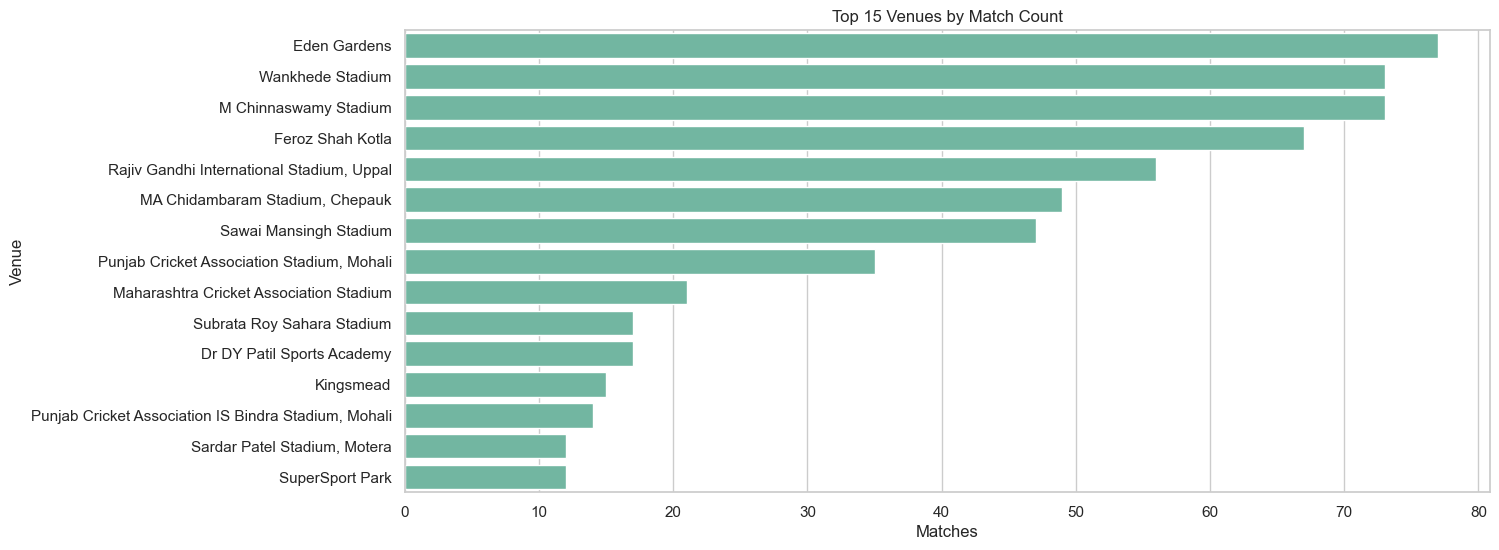

In [14]:
# Venue-wise Match wins

plt.figure(figsize=(14,6))
sns.countplot(y=df["venue"], order=df["venue"].value_counts().index[:15])
plt.title("Top 15 Venues by Match Count")
plt.xlabel("Matches")
plt.ylabel("Venue")
plt.show()

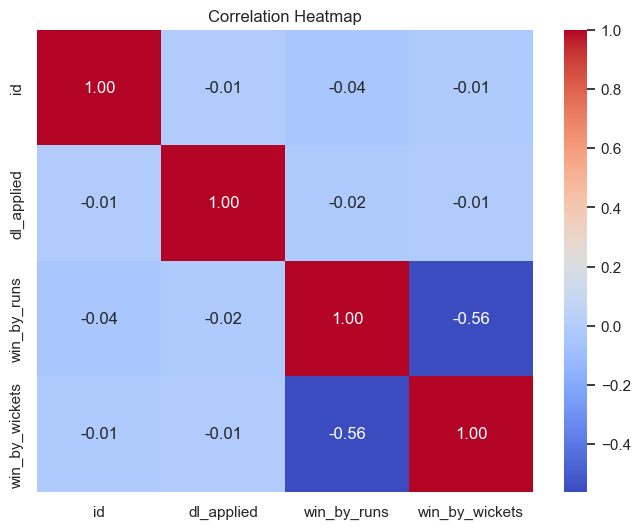

In [49]:
# Correlation Heatmap (numeric columns only)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

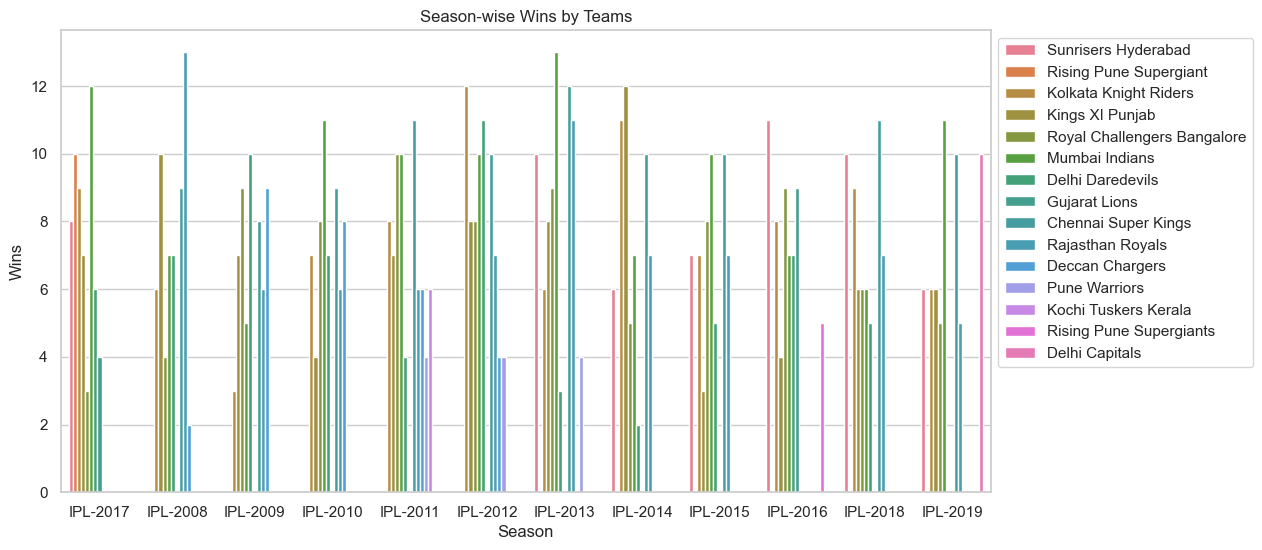

In [16]:
# Season-wise Team Performance

plt.figure(figsize=(12,6))
sns.countplot(x=df["Season"], hue=df["winner"])
plt.title("Season-wise Wins by Teams")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

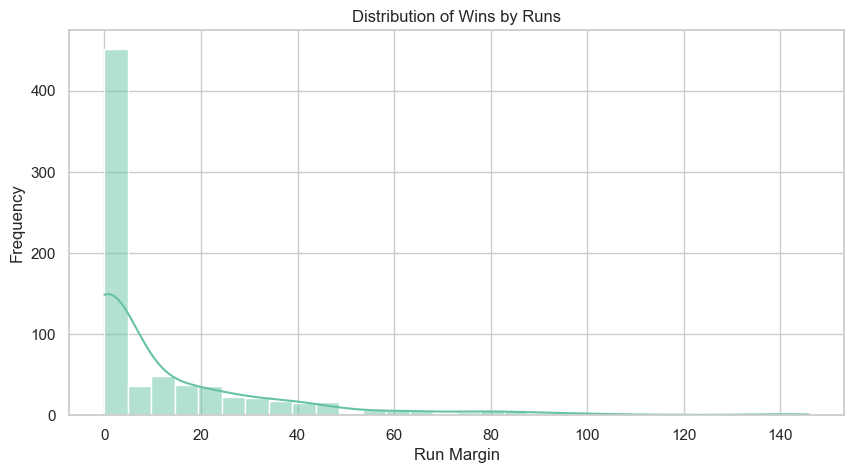

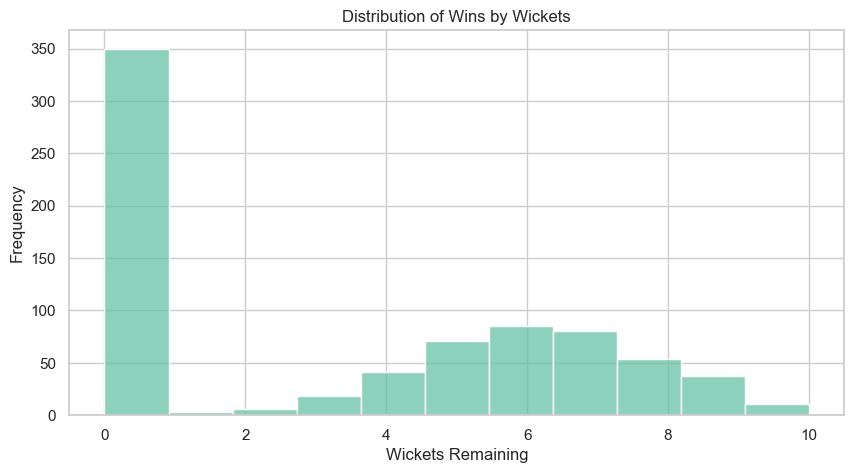

In [17]:
# Win by Runs and Wickets Distribution

plt.figure(figsize=(10,5))
sns.histplot(df["win_by_runs"], bins=30, kde=True)
plt.title("Distribution of Wins by Runs")
plt.xlabel("Run Margin")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["win_by_wickets"], bins=11, kde=False)
plt.title("Distribution of Wins by Wickets")
plt.xlabel("Wickets Remaining")
plt.ylabel("Frequency")
plt.show()

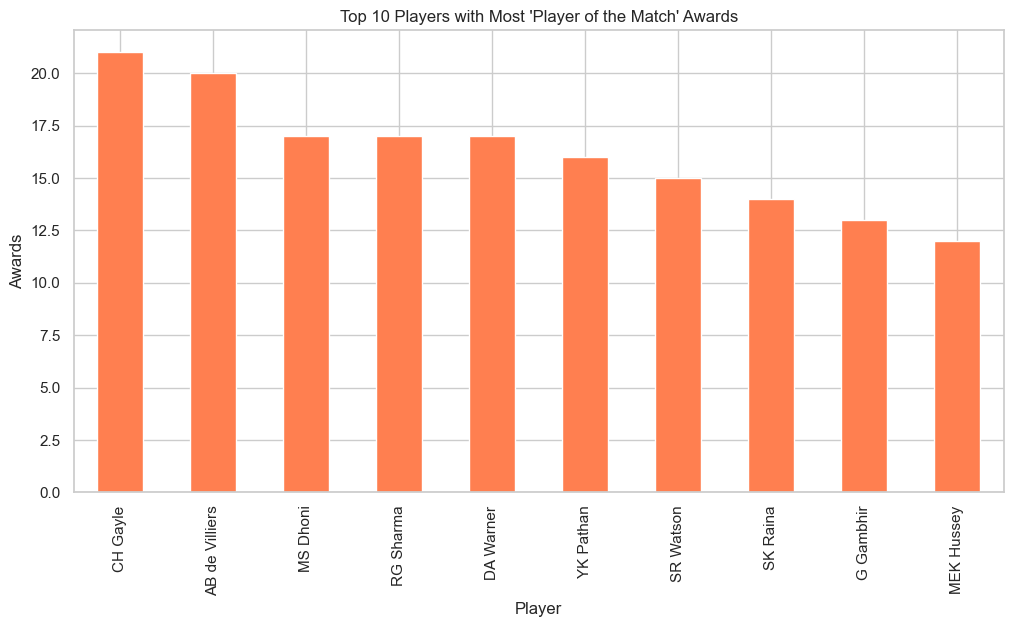

In [18]:
# Top Players with Most 'Player of the Match' Awards

plt.figure(figsize=(12,6))
df["player_of_match"].value_counts().head(10).plot(kind="bar", color="coral")
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Player")
plt.ylabel("Awards")
plt.show()

## 4. Data Preprocessing

In [20]:
# -----------------------------
# 📌 Step 1: Import Libraries
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# -----------------------------
# 📌 Step 2: Encode Categorical Columns
# -----------------------------
df_encoded = df.copy()

# Columns that are categorical
cat_cols = ['team1', 'team2', 'toss_winner', 'winner', 
            'city', 'venue', 'toss_decision', 'result', 
            'player_of_match', 'Season']   # ✅ added Season here

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# -----------------------------
# 📌 Step 3: Define Features (X) and Target (y)
# -----------------------------
X = df_encoded.drop(columns=['id', 'date', 'umpire1', 'umpire2', 'umpire3', 'winner'])  
y = df_encoded['winner']   # target variable

# -----------------------------
# 📌 Step 4: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 📌 Step 5: Feature Scaling
# -----------------------------
scaler = StandardScaler()

# fit only on train, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Preprocessing Done!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

✅ Data Preprocessing Done!
Training set shape: (604, 12)
Testing set shape: (152, 12)


## 5. Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Train & evaluate
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.3684
SVM: Accuracy = 0.5000
KNN: Accuracy = 0.4013
Decision Tree: Accuracy = 0.8618
Random Forest: Accuracy = 0.8158


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:32:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy = 0.9539


## 6. Model Evaluation

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag


Logistic Regression
Accuracy: 0.3684
Precision: 0.3283
Recall: 0.3684
F1 Score: 0.3405
Confusion Matrix:
[[10  1  0  3  1  2  0  1  1  0  0  0  0  0  1  0]
 [ 0  2  0  2  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  2  0  4  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  2  0  5  6  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0  0 11  1  0  0  0  0  2  1  0]
 [ 3  0  0  1  0  1  1  4  8  0  2  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  6  0  4  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  1  0  3  0  0  1  0  0 10  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  2  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

SVM
Accuracy: 0.5000
Precision: 0.5025
Recall: 0.5000
F1 Score: 0.4705
Confu

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:41:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Forest
Accuracy: 0.8092
Precision: 0.7877
Recall: 0.8092
F1 Score: 0.7922
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  4  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0 10  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  1  0 10  0  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1 18  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  2  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]]

XGBoost
Accuracy: 0.9539
Precision: 0.9442
Recall: 0.9539
F1 Score: 0.9457
Confusi

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


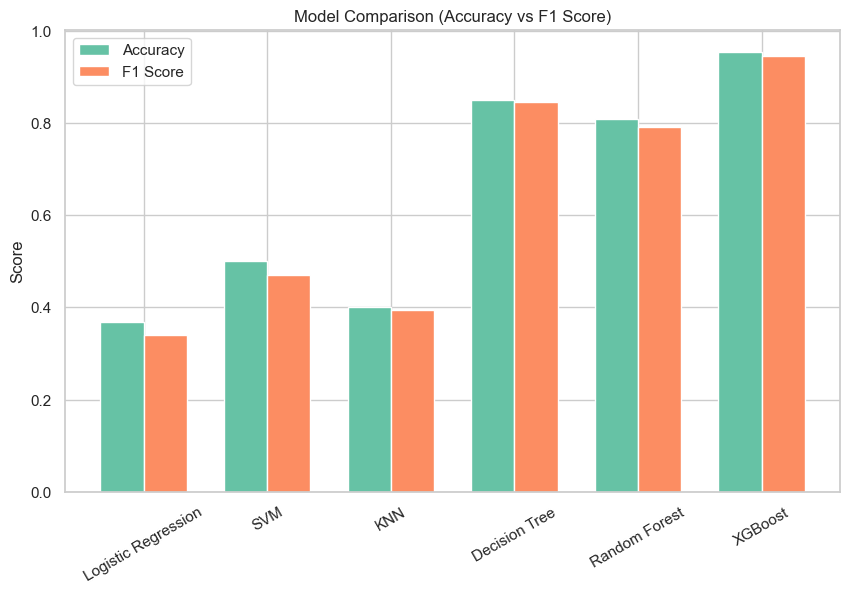


Best Model: XGBoost (Accuracy: 0.9539, F1 Score: 0.9457)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)                                 # Accuracy: overall correctness or overall performance
    prec = precision_score(y_test, y_pred, average="weighted")           # Precision: how many predicted positives were actually correct
    rec = recall_score(y_test, y_pred, average="weighted")               # Recall: how many actual positives were correctly predicted
    f1 = f1_score(y_test, y_pred, average="weighted")                    # F1 Score: harmonic mean of precision and recall

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")                                        # Confusion Matrix: shows true vs predicted per class
    print(confusion_matrix(y_test, y_pred))                           

# -------------------------
# Bar chart comparison
# -------------------------
x = np.arange(len(results["Model"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, results["Accuracy"], width, label="Accuracy")
plt.bar(x + width/2, results["F1 Score"], width, label="F1 Score")

plt.xticks(x, results["Model"], rotation=30)
plt.ylabel("Score")
plt.title("Model Comparison (Accuracy vs F1 Score)")
plt.legend()
plt.show()

# Best model

# Convert to arrays (if lists)
accuracy = np.array(results["Accuracy"])
f1 = np.array(results["F1 Score"])

# Create a combined score (weighted average)
combined_score = (0.5 * f1) + (0.5 * accuracy)

# Get best index
best_index = np.argmax(combined_score)

print(f"\nBest Model: {results['Model'][best_index]} "
      f"(Accuracy: {accuracy[best_index]:.4f}, "
      f"F1 Score: {f1[best_index]:.4f})")


## 7. Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base XGBoost model
xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)

# Parameter space (small, safe ranges)
param_dist = {
    "max_depth": [3, 5, 7],                         # Controls tree depth
    "learning_rate": [0.01, 0.05, 0.1],             # Step size
    "n_estimators": [50, 100, 200, 300],            # Number of trees
    "subsample": [0.7, 0.8, 1.0],                   # Row sampling
    "colsample_bytree": [0.7, 0.8, 1.0]             # Feature sampling
}

# Random search (tries 10 random combinations)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, 
    n_iter=10, cv=5, scoring="accuracy", 
    verbose=1, random_state=42, n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_xgb = random_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Test Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.89      1.00      0.94        17
         

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Comparing model before and after tuning


===== Comparison Table =====
             Model  Accuracy  F1 Score
0  XGBoost Default  0.953947  0.945651
1    XGBoost Tuned  0.973684  0.968044


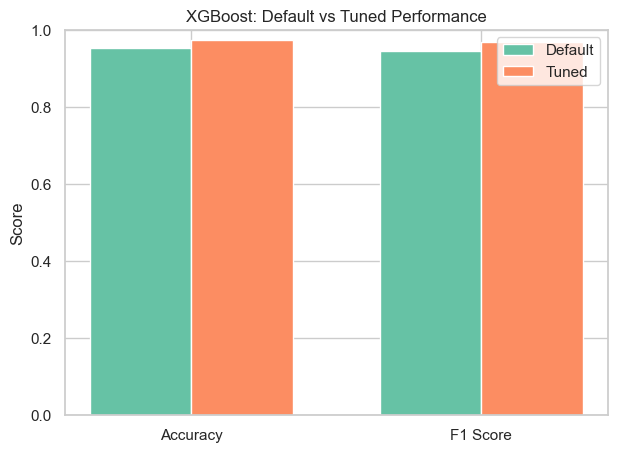

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Predictions
y_pred_default = default_xgb.predict(X_test)
y_pred_tuned   = best_xgb.predict(X_test)

# Metrics
acc_default = accuracy_score(y_test, y_pred_default)
f1_default  = f1_score(y_test, y_pred_default, average="weighted")

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned  = f1_score(y_test, y_pred_tuned, average="weighted")

# ------------------------
# Create Comparison Table
# ------------------------
results_df = pd.DataFrame({
    "Model": ["XGBoost Default", "XGBoost Tuned"],
    "Accuracy": [acc_default, acc_tuned],
    "F1 Score": [f1_default, f1_tuned]
})

print("\n===== Comparison Table =====")
print(results_df)

# ------------------------
# Bar Chart Comparison
# ------------------------
labels = ["Accuracy", "F1 Score"]
default_scores = [acc_default, f1_default]
tuned_scores   = [acc_tuned, f1_tuned]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, default_scores, width, label="Default")
plt.bar(x + width/2, tuned_scores, width, label="Tuned")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("XGBoost: Default vs Tuned Performance")
plt.ylim(0, 1.0)
plt.legend()
plt.show()


## 8. Model Comparison

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# ------------------------
# Define all models
# ------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost (Tuned)": best_xgb   # from tuning step
}

# ------------------------
# Train, Predict & Collect Results
# ------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="weighted")
    
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

# ------------------------
# Results Table
# ------------------------
results_df = pd.DataFrame(results)
print("\n===== Model Comparison =====")
print(results_df)

# ------------------------
# Find Best Model
# ------------------------
best_model = results_df.sort_values(by=["F1 Score", "Accuracy"], ascending=False).iloc[0]
print(f"\n✅ Best Model: {best_model['Model']} "
      f"(Accuracy: {best_model['Accuracy']:.4f}, F1 Score: {best_model['F1 Score']:.4f})")


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Model Comparison =====
                 Model  Accuracy  F1 Score
0  Logistic Regression  0.335526  0.311228
1                  SVM  0.250000  0.194165
2                  KNN  0.302632  0.293567
3        Decision Tree  0.861842  0.858446
4        Random Forest  0.848684  0.832126
5      XGBoost (Tuned)  0.973684  0.968044

✅ Best Model: XGBoost (Tuned) (Accuracy: 0.9737, F1 Score: 0.9680)


## 9. Save Final Model

In [48]:
import pickle
from sklearn.metrics import classification_report

# ------------------------
# Save the best model
# ------------------------
with open("best_model_for_IPL_WP.pkl", "wb") as f:
    pickle.dump(best_xgb, f)   # here best_xgb is the tuned model
print("✅ Best model saved as best_model_for_IPL_WP.pkl")

# ------------------------
# Evaluate and document performance
# ------------------------
y_pred = best_xgb.predict(X_test)
print("\n📊 Final Model (XGBoost - Tuned) Performance:\n")
print(classification_report(y_test, y_pred))

✅ Best model saved as best_model_for_IPL_WP.pkl

📊 Final Model (XGBoost - Tuned) Performance:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.89      1.00      0.94        17
          14       0.92      0.92      0.92        12
          15       0.00      0.00      0

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

## 🔍 Overall Insights  

- 🏆 **Mumbai Indians** and **Chennai Super Kings** have won the most matches — showing long-term consistency.  
- 🕰️ **Match count per season** increased till 2013 and then stabilized, showing IPL’s steady expansion.  
- 🎯 **Toss winners** have a higher chance of winning the match — toss outcome strongly influences results.  
- ⚖️ **Chasing teams** often win comfortably (many wickets left), while **defending teams** usually win narrowly.  
- 📍 Some **venues favor chasing sides**, especially under dew conditions (night games). 


## 💡 Recommendations
 - 🧠 After winning the toss, **choose to field first** — chasing provides a strategic edge.  
 - 🏏 Build a **strong top-order** and **reliable finishers** to ensure stable and confident chases.  
 - 🎯 Improve **death bowling** skills to defend small totals effectively.  
 - 🗺️ Use **venue-specific analysis** — adapt team strategy to pitch, weather, and match timing.  
 - 👥 Maintain a **balanced team** with both strong batting and bowling units.

## 📌 Conclusion  

- ✅ **Best Model:** The XGBoost model outperformed all other models in terms of Accuracy, Precision, Recall, and F1-Score.  

- 🔧 **Possible Improvements:**  
  - Further hyperparameter tuning with GridSearchCV or RandomizedSearchCV.  
  - Using cross-validation to ensure robustness and reduce overfitting.  

- 📊 **Additional Features for Better Predictions:**  
  - Player statistics (batting average, strike rate, economy rate).  
  - Team form in the last few matches.  
  - Venue-specific performance and pitch conditions.  
  - Toss results and match day conditions (weather).  

- ⚡ **Challenges Faced & Solutions:**  
  - Handling categorical data like team names and seasons → solved using **Label Encoding**.  
  - Scaling numerical features → handled using **StandardScaler**.  
  - Model overfitting → mitigated by applying train-test split and tuning.  

- 🎯 **Final Note:**  
  This project provides a strong baseline for IPL winner prediction. With richer datasets and advanced feature engineering, the model’s accuracy can be further improved for real-world applications.
